In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# Summary Statistics

In [7]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Observations :-
    
1. Mean is more than median for Unnamed:0 column.
2. There is large difference between 75 % and maximum for newspaper column.

# Exploring Target Variable

In [8]:
pd.set_option('display.max_rows',None)
df['sales'].value_counts()

9.7     5
12.9    4
11.7    4
15.9    4
25.4    3
13.4    3
10.6    3
13.2    3
10.1    3
20.7    3
12.2    3
9.5     3
11.8    3
11.6    3
11.9    3
8.7     3
15.5    3
18.0    3
14.8    2
11.3    2
9.3     2
17.4    2
7.6     2
10.3    2
12.6    2
14.7    2
15.2    2
6.6     2
7.3     2
19.6    2
23.8    2
22.6    2
18.9    2
11.5    2
19.2    2
11.0    2
10.4    2
16.6    2
19.0    2
11.4    2
17.1    2
12.5    2
5.3     2
14.9    2
12.0    2
15.0    2
10.5    2
20.2    2
8.8     2
10.8    2
10.9    2
7.2     2
12.8    2
9.6     2
14.6    2
17.3    2
22.3    1
14.1    1
17.6    1
19.7    1
9.9     1
8.0     1
17.2    1
22.2    1
25.5    1
6.7     1
27.0    1
14.5    1
13.3    1
15.6    1
7.0     1
16.0    1
17.0    1
14.0    1
5.5     1
8.5     1
21.5    1
24.7    1
16.7    1
18.3    1
1.6     1
12.7    1
5.7     1
3.2     1
4.8     1
8.6     1
12.3    1
20.8    1
23.2    1
14.4    1
26.2    1
21.2    1
15.3    1
23.7    1
8.4     1
8.1     1
24.2    1
13.6    1
21.7    1
6.9     1


In [9]:
# As we have continuos values in sales column, so, this is a regression problem.

# Data Visualizations

To check missing values

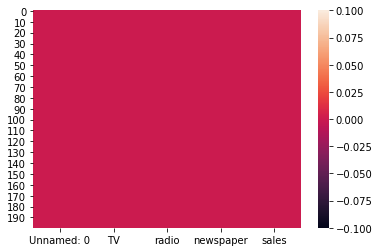

In [10]:
 sns.heatmap(df.isnull())

Observations:-
    
    1. There is no missing values in the dataset.

In [11]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

# Univariate Analysis

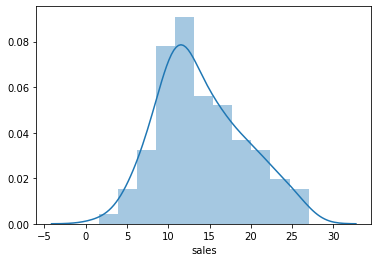

In [12]:
sns.distplot(df['sales'])

Observations :-
    
1. Number of items having Sales is directly proportional to Sales in the range of 0-12.
2. Number of items having Sales is inversely proportional to Sales in the range of 12-30.

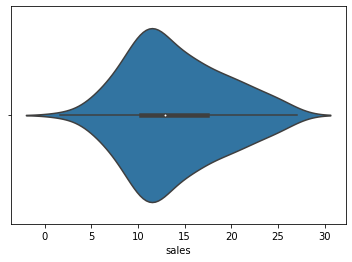

In [13]:
sns.violinplot(df['sales'])

Observations :-
    
1. Majority of sales are in the range of 10-15.

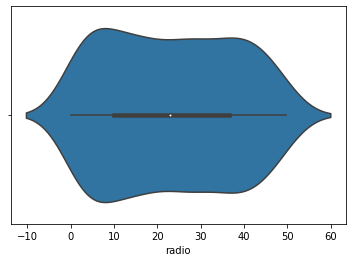

In [14]:
sns.violinplot(df['radio'])

Observations :-

1. Majority of radios are in the range of 5-45.

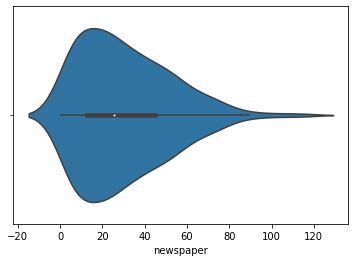

In [15]:
sns.violinplot(df['newspaper'])

Observations :-

1. Majority of newspapers are in the range of 10-30.

# To check correlation

In [16]:
dfcor=df.corr()
dfcor

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


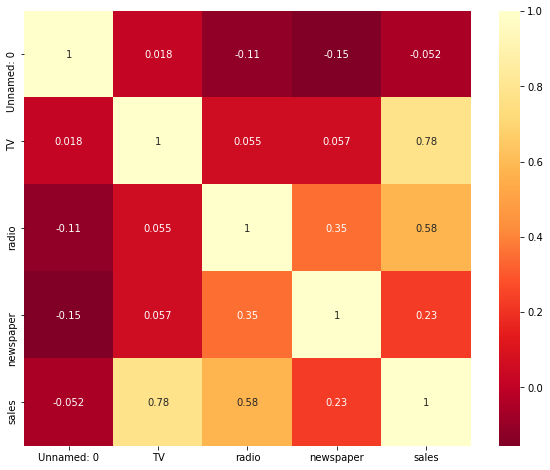

In [17]:
# Multivariate Analysis
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

Observations :-
    
1. Sales are highly positively correlated to TV.
2. TV is highly negatively correlated to radio.
3. Radio is highly positively correlated to newspaper.
4. Radio is highly negatively correlated to sales.

# Bivariate Analysis

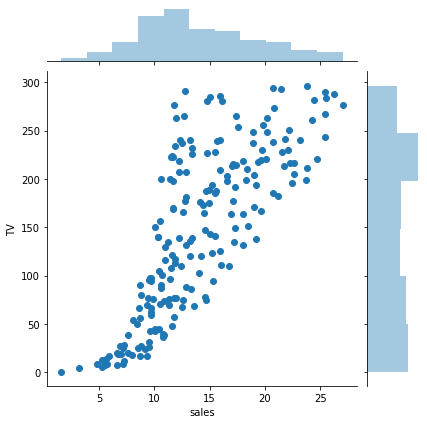

In [18]:
sns.jointplot(x='sales',y='TV',data=df)

Observations :-
    
1. Sales are more dispersed after 15.

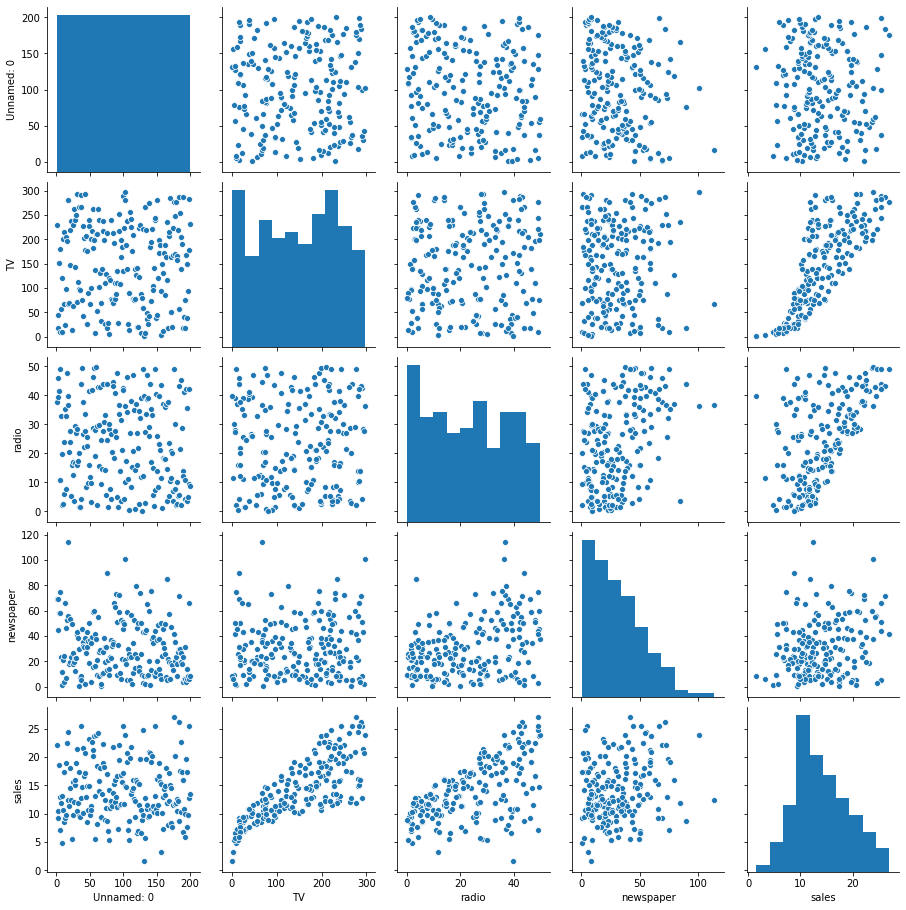

In [19]:
sns.pairplot(df)

Observations :-
    
1. Higly positively correlation is present between Tv & sales, Radio and sales.
2. Data is highly dispersed between rest of the plottings.

# Plotting Outliers

Unnamed: 0       AxesSubplot(0.125,0.657941;0.168478x0.222059)
TV            AxesSubplot(0.327174,0.657941;0.168478x0.222059)
radio         AxesSubplot(0.529348,0.657941;0.168478x0.222059)
newspaper     AxesSubplot(0.731522,0.657941;0.168478x0.222059)
sales            AxesSubplot(0.125,0.391471;0.168478x0.222059)
dtype: object

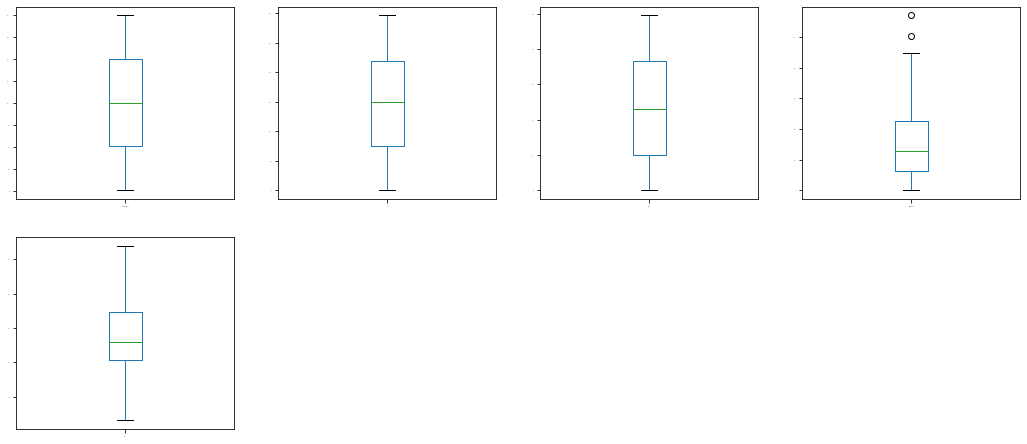

In [20]:
df.plot(kind='box',subplots=True,layout=(3,4),sharex=False,fontsize=1,figsize=(18,12))

Observations :-
    
1. Outliers are present in Newspaper column.

# `Removing Outliers

In [21]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.72341210e+00, 9.69852266e-01, 9.81522472e-01, 1.77894547e+00,
        1.55205313e+00],
       [1.70609137e+00, 1.19737623e+00, 1.08280781e+00, 6.69578760e-01,
        6.96046111e-01],
       [1.68877065e+00, 1.51615499e+00, 1.52846331e+00, 1.78354865e+00,
        9.07405869e-01],
       [1.67144992e+00, 5.20496822e-02, 1.21785493e+00, 1.28640506e+00,
        8.60330287e-01],
       [1.65412920e+00, 3.94182198e-01, 8.41613655e-01, 1.28180188e+00,
        2.15683025e-01],
       [1.63680847e+00, 1.61540845e+00, 1.73103399e+00, 2.04592999e+00,
        1.31091086e+00],
       [1.61948775e+00, 1.04557682e+00, 6.43904671e-01, 3.24708413e-01,
        4.27042783e-01],
       [1.60216702e+00, 3.13436589e-01, 2.47406325e-01, 8.72486994e-01,
        1.58039455e-01],
       [1.58484630e+00, 1.61657614e+00, 1.42906863e+00, 1.36042422e+00,
        1.77205942e+00],
       [1.56752558e+00, 6.16042873e-01, 1.39530685e+00, 4.30581584e-01,
        6.57617064e-01],
       [1.55020485e+00, 9.4515

In [22]:
threshold=3
df_new=df[(z<3).all(axis=1)]

In [23]:
df_new.shape

(198, 5)

In [24]:
df.shape

(200, 5)

In [25]:
#2 rows are removed as outliers

In [26]:
((200-198)/200)*100

1.0

In [27]:
df=df_new

In [28]:
df.shape

(198, 5)

# To check skewness

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018512E0C2C8>,
      dtype=object)

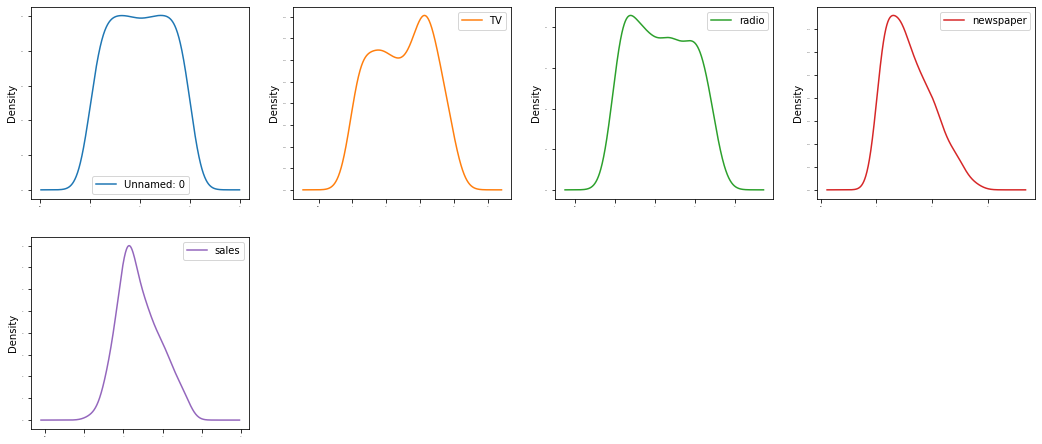

In [29]:
df.plot(kind='density',subplots=True,layout=(3,4),sharex=False,fontsize=1,figsize=(18,12))

Observations :-
    
1. Newspaper is right skewed.

In [30]:
df.skew()

Unnamed: 0   -0.006283
TV           -0.082332
radio         0.114842
newspaper     0.650112
sales         0.407130
dtype: float64

In [31]:
list=[ 'newspaper' ]
for val in list:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [32]:
df.skew()

Unnamed: 0   -0.006283
TV           -0.082332
radio         0.114842
newspaper    -0.040649
sales         0.407130
dtype: float64

# Train Test Split

In [33]:
x=df[['Unnamed: 0','TV', 'radio', 'newspaper']]

y=df['sales']


# Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [35]:
x=pd.DataFrame(x)

In [36]:
x.columns=[ 'Unnamed: 0','TV', 'radio', 'newspaper']

In [37]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    r2score=r2_score(y_test,pred)
    print(r2_score(y_test,pred))
    print('error:')
    print('Mean absolute error:',mean_absolute_error(y_test,pred))
    print('Mean squared error:',mean_squared_error(y_test,pred))
    print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
    if r2score>maxAccu:
        maxAccu=r2score
        maxRS=i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

0.8982537645682069
error:
Mean absolute error: 1.2016647080102663
Mean squared error: 2.715213387670742
Root Mean squared error: 1.6477904562385177
0.8436296856893155
error:
Mean absolute error: 1.4667712315238928
Mean squared error: 4.350884456404928
Root Mean squared error: 2.085877382878708
0.9129519284971043
error:
Mean absolute error: 1.3331616109449975
Mean squared error: 2.7875004667292247
Root Mean squared error: 1.66958092548077
0.8623183351128341
error:
Mean absolute error: 1.1713981354180243
Mean squared error: 2.35257784434387
Root Mean squared error: 1.5338115413387232
0.8516875692225017
error:
Mean absolute error: 1.4260535620404369
Mean squared error: 3.2230160434867225
Root Mean squared error: 1.7952760354571446
0.8874055795657949
error:
Mean absolute error: 1.2251728057785547
Mean squared error: 3.579527255535676
Root Mean squared error: 1.8919638621114505
0.9073786944642309
error:
Mean absolute error: 1.3624943094990947
Mean squared error: 2.838461717251322
Root Mean 

Best accuracy is 0.9425532941055315 on Random_state 90

# Algorithms

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=90)
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.9425532941055315
error:
Mean absolute error: 1.0469209576700451
Mean squared error: 1.629204009067471
Root Mean squared error: 1.2764027613051732


In [40]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
r2score=r2_score(y_test,preddtr)
print(r2_score(y_test,preddtr))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,preddtr))
print('Mean squared error:',mean_squared_error(y_test,preddtr))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,preddtr)))


0.9612934810878623
error:
Mean absolute error: 0.8681818181818179
Mean squared error: 1.0977272727272727
Root Mean squared error: 1.047724807727331


In [41]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
predknn=knn.predict(x_test)
r2score=r2_score(y_test,predknn)
print(r2_score(y_test,predknn))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predknn))
print('Mean squared error:',mean_squared_error(y_test,predknn))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predknn)))


0.8845327643069508
error:
Mean absolute error: 1.2868181818181816
Mean squared error: 3.2746818181818167
Root Mean squared error: 1.8096081946603295


In [42]:
svm=SVR()
svm.fit(x_train,y_train)
predsvr=svm.predict(x_test)
r2score=r2_score(y_test,predsvr)
print(r2_score(y_test,predsvr))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predsvr))
print('Mean squared error:',mean_squared_error(y_test,predsvr))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predsvr)))


0.884764569647645
error:
Mean absolute error: 1.0899558399714713
Mean squared error: 3.2681077564579635
Root Mean squared error: 1.8077908497550161


In [43]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [44]:
rd=Ridge(alpha=.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred=rd.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.9425532058653943
error:
Mean absolute error: 1.0469217844935204
Mean squared error: 1.6292065115814625
Root Mean squared error: 1.2764037416043024


In [45]:
ls=Lasso(alpha=.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred=ls.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.9425534774590596
error:
Mean absolute error: 1.0469028892639753
Mean squared error: 1.6291988091121652
Root Mean squared error: 1.276400724346459


In [46]:
el=ElasticNet(alpha=.0001)
el.fit(x_train,y_train)
el.score(x_train,y_train)
pred=el.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))


0.9425466596939226
error:
Mean absolute error: 1.0469747905794689
Mean squared error: 1.6293921627626682
Root Mean squared error: 1.2764764638498698


# Cross Validation Scores

In [47]:
from sklearn.model_selection import cross_val_score
lsscores=cross_val_score(ls,x,y,cv=5)
print(lsscores)
print(lsscores.mean(),lsscores.std())

[0.86876195 0.91624621 0.92555038 0.80895953 0.89604978]
0.8831135687941505 0.04188267158575255


In [48]:
from sklearn.model_selection import cross_val_score
dtrscores=cross_val_score(dtr,x,y,cv=5)
print(dtrscores)
print(dtrscores.mean(),dtrscores.std())

[0.94846114 0.95562154 0.93529951 0.9312812  0.96910627]
0.9479539335886329 0.013744711282047106


In [49]:
list1=[0.9425534774590596,0.9619105415342877]
list2=[0.8831135687941505,0.9466562799768699]
difference=[]
zip_object = zip(list1, list2)
for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)


print(difference)


[0.059439908664909114, 0.015254261557417825]


dtr is the best algorithm with accuracy score of 96.191 % because the difference between accuracy score and cross validation
score of dtr is least.

# Hyper Parameter Tuning

In [50]:
dtr=DecisionTreeRegressor()
grid_param={'criterion':["mse", "friedman_mse", "mae", "poisson"],'splitter' : ["best", "random"],'min_samples_split':[2,4,6,8],'max_features':["auto", "sqrt", "log2"]}
gd_sr=GridSearchCV(estimator=dtr,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6, 8],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [51]:
gd_sr.best_params_

{'criterion': 'mse',
 'max_features': 'auto',
 'min_samples_split': 2,
 'splitter': 'best'}

In [52]:
dtr=DecisionTreeRegressor(criterion='mse',
 max_features='auto',
 min_samples_split=2,
 splitter='best')
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
r2score=r2_score(y_test,preddtr)
print(r2_score(y_test,preddtr))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,preddtr))
print('Mean squared error:',mean_squared_error(y_test,preddtr))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,preddtr)))


0.9648756371859422
error:
Mean absolute error: 0.8113636363636361
Mean squared error: 0.9961363636363635
Root Mean squared error: 0.9980663122440129


After hyper parameter tuning, accuracy score of Decision Tree Regressor has changed from 96.191 % to 96.487 %

In [54]:
# Aoc - roc is not possible in case of Decision Tree Regressor

# Saving the model

In [55]:
import joblib 

In [56]:
joblib.dump(dtr,"dtr_advertising.obj")

['dtr_advertising.obj']